## Example notebook to use gwNRHME framework
This framework is developed in https://arxiv.org/abs/2403.15506.

Utilizing publicly available non-spinning eccentric binary black hole (BBH) merger simulations from the SXS collaboration, we presents convincing evidence that the waveform 
phenomenology in eccentric BBH mergers is significantly simpler than previously thought. We find that the eccentric modulations in the amplitudes, phases, and frequencies in 
different spherical harmonic modes are all related and can be modeled using a single time series modulation. Using this universal eccentric modulation, we provide a framework 
named \texttt{gwNRHME} to seamlessly convert a multi-modal (i.e with several spherical harmonic modes) quasi-circular waveform into multi-modal eccentric waveform if the 
quadrupolar eccentric waveform is known. This reduces the modelling complexity of eccentric BBH mergers drastically as we now have to model only a single eccentric modulation 
time-series instead of modelling the effect of eccentricity in all modes. When compared with the NR simulations, our framework mismatches are mostly ∼0.001 and are comparable to 
the numerical errors in the NR simulations. Our method is modular and can be readily added to any quadrupolar non-spinning eccentric waveform model. 

In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import matplotlib.pyplot as plt
import numpy as np

# import gwModels
import sys
PATH_TO_GWMODELS = "/Users/tousifislam/Documents/work/gwModels/" 
# PATH_TO_GWMODELS = "/home/tousifislam/Documents/works/git_repos/gwModels/"
sys.path.append(PATH_TO_GWMODELS)
import gwModels

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
Loaded NRHybSur3dq8 model


In [2]:
import gwsurrogate
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')

Loaded NRHybSur3dq8 model


#### 1. Generate eccentric 22 mode waveform 

We use EccentricIMR model, developed in https://arxiv.org/abs/1709.02007 and is originally hosted in https://github.com/ianhinder/EccentricIMR.

In [3]:
# Set the path to your Wolfram kernel 
# you will need Mathematica installed along with wolframclient
# wolfram_kernel_path = '/home/tousifislam/Documents/Mathematica/ScriptDir/WolframKernel'
wolfram_kernel_path =  '/Applications/Wolfram.app/Contents/MacOS/WolframKernel'

# Set the path to the directory containing the EccentricIMR package
package_directory = PATH_TO_GWMODELS + '/externals/EccentricIMR2017/'
# package_directory = '/home/tousifislam/.Mathematica/Applications/EccentricIMR/'

# instantiate the EccentricIMR class - it may take some time
wf = gwModels.models.EccentricIMR(wolfram_kernel_path, package_directory)

In [4]:
# Set the binary parameters
params = {"q": 2, # mass ratio
          "x0": 0.07, # reference initial dimensionless orbital frequency
          "e0": 0.1, # initial eccentricity
          "l0": 0, # initial mean anomaly
          "phi0": 0, # initial reference phase
          "t0": 0} # some initial reference time - not much relevant for us

In [5]:
# generate eccentric 22 mode waveform
tecc, hecc = wf.generate_waveform(params)

Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Further output of MessageName[General, munfl] will be suppressed during this calculation.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.
Further output of MessageName[General, munfl] will be suppressed during this calculation.
Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


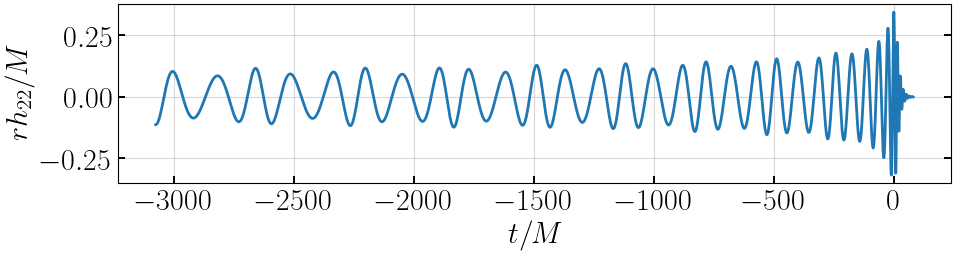

In [6]:
# plot waveform
plt.figure(figsize=(10,3))
plt.plot(tecc, hecc, '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{22}/M$')
plt.tight_layout()
plt.show()

#### 2. Generate multi-modal circular waveform

We use NRHybSur3dq to generate circular waveform in the non-spinning limit.

In [7]:
gwsur = gwModels.models.genNRHybSur3dq8()

Loaded NRHybSur3dq8 model


In [8]:
tsur, hsur = gwsur.generate_NRHybSur3dq8(params)
print(hsur.keys())

dict_keys(['h_l2m1', 'h_l2m2', 'h_l3m2', 'h_l4m4', 'h_l3m3', 'h_l3m1', 'h_l4m3', 'h_l4m2', 'h_l5m5'])


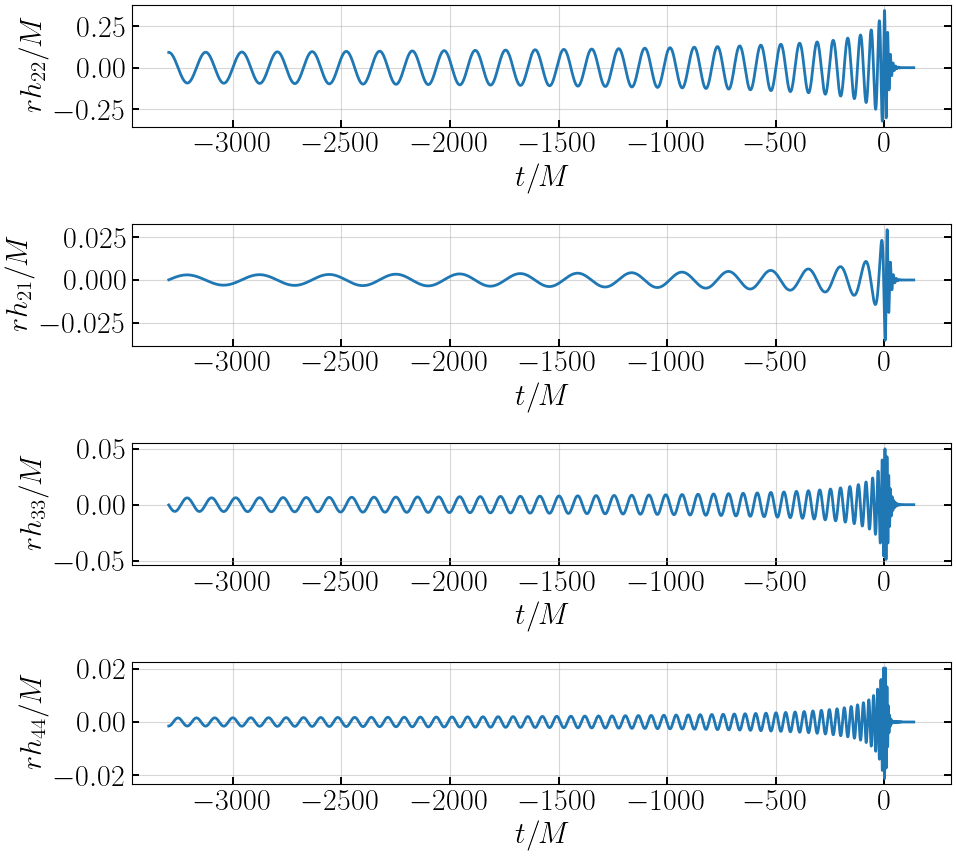

In [9]:
# plot waveform
plt.figure(figsize=(10,9))
plt.subplot(411)
plt.plot(tsur, hsur['h_l2m2'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{22}/M$')
plt.subplot(412)
plt.plot(tsur, hsur['h_l2m1'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{21}/M$')
plt.subplot(413)
plt.plot(tsur, hsur['h_l3m3'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{33}/M$')
plt.subplot(414)
plt.plot(tsur, hsur['h_l4m4'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{44}/M$')
plt.tight_layout()
plt.show()

#### 3. Combine them to obtain multi-modal eccentric waveforms

In [10]:
gwnrhme = gwModels.core.NRHME(t_ecc = tecc,
                         h_ecc_dict = {'h_l2m2': hecc},
                         t_cir = tsur,
                         h_cir_dict = hsur)

tNRE = gwnrhme.t_common
hNRE = gwnrhme.hNRE

..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using newer module scipy.integrate.cumulative_trapezoid
..... scipy.integrate.cumtrapz is no longer supported by your environment; using ne

In [11]:
print(hNRE.keys())

dict_keys(['h_l2m2', 'h_l2m1', 'h_l3m2', 'h_l4m4', 'h_l3m3', 'h_l3m1', 'h_l4m3', 'h_l4m2', 'h_l5m5'])


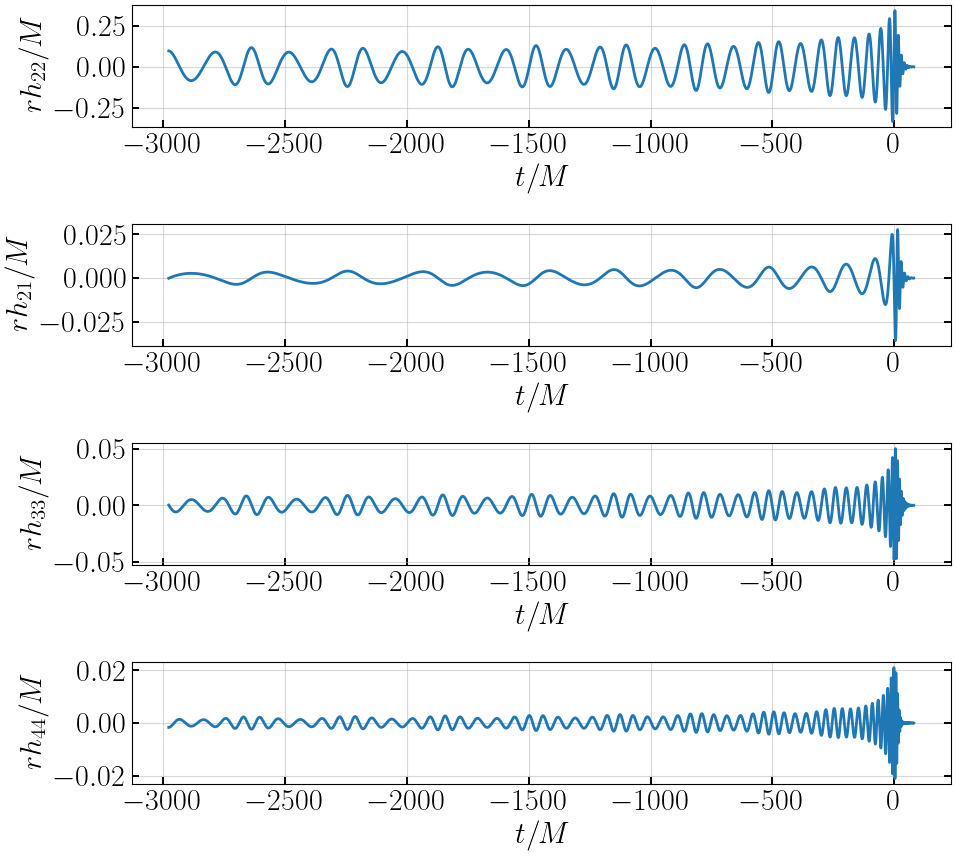

In [12]:
# plot waveform
plt.figure(figsize=(10,9))
plt.subplot(411)
plt.plot(tNRE, hNRE['h_l2m2'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{22}/M$')
plt.subplot(412)
plt.plot(tNRE, hNRE['h_l2m1'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{21}/M$')
plt.subplot(413)
plt.plot(tNRE, hNRE['h_l3m3'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{33}/M$')
plt.subplot(414)
plt.plot(tNRE, hNRE['h_l4m4'], '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{44}/M$')
plt.tight_layout()
plt.show()